In [1]:
# with open("comments.json", "r") as file:
#     doubled = file.read()
#     initial = doubled[:len(doubled) // 2]
# 
# with open("comments_fixed.json", "w") as file:
#     file.write(initial.replace("\xa0", " ").replace("­", "").replace("​", ""))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json("data/comments_fixed.json").set_index("id")

In [4]:
df = df[["text", "level"]]
df = df[df["level"] < 5]
df = df.drop_duplicates()

In [5]:
print(df.shape)
df["level"].value_counts()

(496132, 2)


level
0    226958
1    139401
2     66634
3     39708
4     23431
Name: count, dtype: int64

(array([14979., 38515., 43951., 41689., 36714., 32163., 27728., 24614.,
        21719., 19222., 16602., 14916., 13326., 11932., 10681.,  9487.,
         8765.,  7859.,  7121.,  6628.,  6000.,  5437.,  5061.,  4640.,
         4109.,  3873.,  3487.,  3328.,  3017.,  2778.,  2697.,  2510.,
         2325.,  2102.,  2013.,  1812.,  1654.,  1647.,  1476.,  1435.,
         1303.,  1197.,  1123.,  1068.,  1009.,   950.,   905.,   846.,
          797.,   791.,   692.,   686.,   604.,   592.,   646.,   519.,
          499.,   485.,   497.,   444.,   409.,   410.,   363.,   367.,
          325.,   312.,   292.,   296.,   298.,   252.,   256.,   243.,
          236.,   247.,   210.,   179.,   170.,   178.,   176.,   168.,
          163.,   136.,   147.,   150.,   151.,   107.,   125.,   121.,
          114.,   110.,   105.,   126.,   109.,   112.,    96.,    93.,
           83.,    89.,    86.,    98.]),
 array([  0.  ,   2.99,   5.98,   8.97,  11.96,  14.95,  17.94,  20.93,
         23.92,  26.91

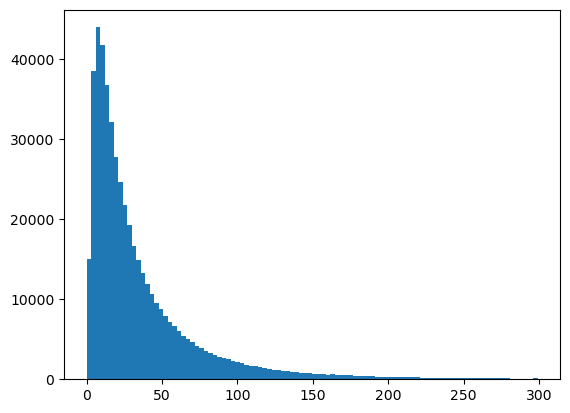

In [6]:
word_count = df["text"].map(lambda text: len(text.split()))
plt.hist(word_count[word_count < 300], bins=100)

In [7]:
df = df[(word_count > 10) & (word_count < 50)]

In [8]:
df.to_csv("data/comments.csv")

In [9]:
only_level_0 = df[df["level"] == 0]
only_level_0.sample(100_000).to_csv("data/comments_small.csv")
only_level_0.sample(10_000).to_csv("data/comments_tiny.csv")

In [10]:
tiny_df = pd.read_csv("data/comments_tiny.csv")
print(tiny_df["text"].map(len).sum())
print(tiny_df["text"].map(lambda text: len(text.split())).sum())

1619279
255803
